In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder


In [2]:
# Step 1: Load the dataset
df = pd.read_csv("student_performance.csv")  # Replace with actual dataset file
print("First 5 rows of the dataset:")
print(df.head())  # Display first few rows of the dataset

First 5 rows of the dataset:
   Sl.No.         USN      STUDENT NAME  TestI  TestII    TestIII  TestTotal  \
0       1  1RV21MC001        ABHISHEK M     34      39  29.000000          1   
1       2  1RV21MC006     AJITH KUMAR K     30      33  30.000000          1   
2       3  1RV21MC009   AKASH E PUNAGIN     28      36  28.666667          1   
3       4  1RV21MC011        AMIT KUMAR     16      28  25.333333          1   
4       5  1RV21MC012  ANANDGOUDA PATIL     25      42  31.333333          1   

   TestResult  Quiz1  Quiz2  Compensatory Quiz  QuizResult  Test + Quiz  \
0         4.0    6.0   10.0               16.0   45.000000           14   
1         6.5    6.0    9.0               15.5   45.500000           14   
2         7.0    5.0    NaN               12.0   40.666667           14   
3         3.0    2.0   10.0               13.0   38.333333           13   
4         6.0    5.0   10.0               16.0   47.333333           13   

   Assignment  AssignmentResult  Result

In [3]:
# Step 2: Prepare Features (X) and Target Variable (y)
# Assuming 'Performance' is the target column, replace it if needed
X = df.drop(columns=['USN','STUDENT NAME'])  # Features (independent variables)
y = df['Result']  # Target variable (dependent variable)

In [4]:
# Convert any remaining categorical features to numeric
for col in X.select_dtypes(include=['object']).columns:
    X[col] = LabelEncoder().fit_transform(X[col])  # Encode categorical features

In [5]:
# Step 3: Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Step 4: Define the hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],      # Number of trees in the forest
    'max_depth': [10, 20, None],          # Maximum depth of trees
    'min_samples_split': [2, 5, 10],      # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],        # Minimum samples required at a leaf node
    'bootstrap': [True, False]            # Whether to use bootstrap samples
}


In [7]:
# Step 5: Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

In [8]:

# Step 6: Perform Grid Search to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 162 candidates, totalling 810 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [9]:
# Step 7: Extract the best parameters from GridSearchCV
best_params = grid_search.best_params_
print("Best Parameters Found:", best_params)

Best Parameters Found: {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [10]:
# Step 8: Train the model using the best parameters
rf_best = RandomForestClassifier(**best_params, random_state=42)
rf_best.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=10, random_state=42)

In [11]:
# Step 9: Predict the test set results
y_pred = rf_best.predict(X_test)

In [12]:
# Step 10: Evaluate the Model
# Compute Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

In [13]:
# Display evaluation metrics
print("\nConfusion Matrix:\n", conf_matrix)
print("\nAccuracy Score:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Confusion Matrix:
 [[7 0]
 [0 7]]

Accuracy Score: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         7

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14



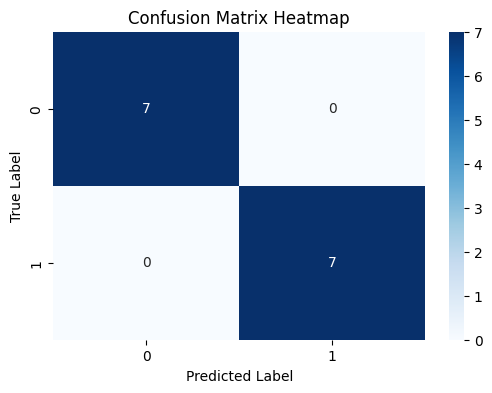

In [14]:
# Step 11: Visualizing Results

# Plot Confusion Matrix as a Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [15]:
# Feature Importance Analysis
feature_importance = pd.Series(rf_best.feature_importances_, index=X.columns).sort_values(ascending=False)

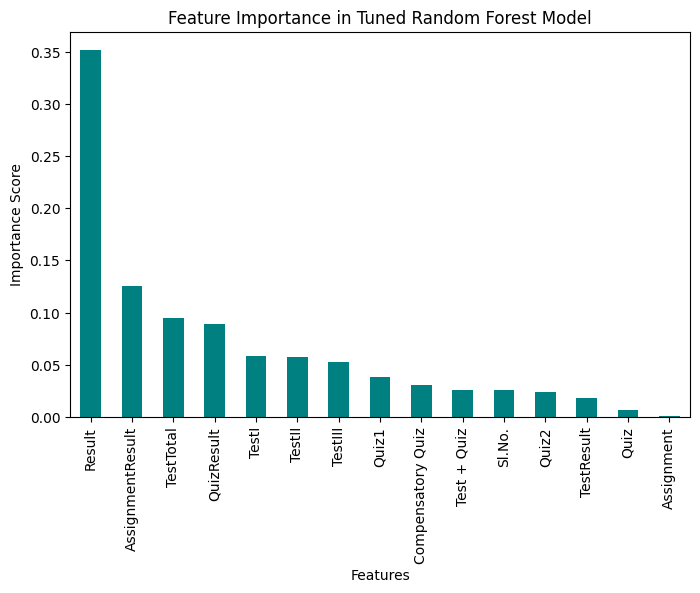

In [16]:
# Plot Feature Importance
plt.figure(figsize=(8, 5))
feature_importance.plot(kind='bar', color='teal')
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.title("Feature Importance in Tuned Random Forest Model")
plt.show()